In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn import preprocessing

from numpy import sort
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/cleaned_train.csv')
test = pd.read_csv('data/cleaned_test.csv')

In [3]:
X_train = train.copy()
X_train.drop(columns=['Opportunity_Created_Year', 'Month', 'Account_Created_Date', 'Unnamed: 0', 'Target'], inplace=True)

In [4]:
Region = list(train['Region'])
le = preprocessing.LabelEncoder()
Region_codificada = le.fit_transform(Region)
X_train['Region'] = Region_codificada

Territory = list(train['Territory'])
le = preprocessing.LabelEncoder()
Territory_codificada = le.fit_transform(Territory)
X_train['Territory'] = Territory_codificada

Billing_Country = list(train['Billing_Country'])
le = preprocessing.LabelEncoder()
Billing_Country_codificada = le.fit_transform(Billing_Country)
X_train['Billing_Country'] = Billing_Country_codificada

Account_Name = list(train['Account_Name'])
le = preprocessing.LabelEncoder()
Account_Name_codificada = le.fit_transform(Account_Name)
X_train['Account_Name'] = Account_Name_codificada

Opportunity_Name = list(train['Opportunity_Name'])
le = preprocessing.LabelEncoder()
Opportunity_Name_codificada = le.fit_transform(Opportunity_Name)
X_train['Opportunity_Name'] = Opportunity_Name_codificada

Account_Owner = list(train['Account_Owner'])
le = preprocessing.LabelEncoder()
Account_Owner_codificada = le.fit_transform(Account_Owner)
X_train['Account_Owner'] = Account_Owner_codificada

Opportunity_Type = list(train['Opportunity_Type'])
le = preprocessing.LabelEncoder()
Opportunity_Type_codificada = le.fit_transform(Opportunity_Type)
X_train['Opportunity_Type'] = Opportunity_Type_codificada

Quote_Type = list(train['Quote_Type'])
le = preprocessing.LabelEncoder()
Quote_Type_codificada = le.fit_transform(Quote_Type)
X_train['Quote_Type'] = Quote_Type_codificada

Account_Type = list(train['Account_Type'])
le = preprocessing.LabelEncoder()
Account_Type_codificada = le.fit_transform(Account_Type)
X_train['Account_Type'] = Account_Type_codificada

Opportunity_Owner = list(train['Opportunity_Owner'])
le = preprocessing.LabelEncoder()
Opportunity_Owner_codificada = le.fit_transform(Opportunity_Owner)
X_train['Opportunity_Owner'] = Opportunity_Owner_codificada

Delivery_Terms = list(train['Delivery_Terms'])
le = preprocessing.LabelEncoder()
Delivery_Terms_codificada = le.fit_transform(Delivery_Terms)
X_train['Delivery_Terms'] = Delivery_Terms_codificada

Currency = list(train['Currency'])
le = preprocessing.LabelEncoder()
Currency_codificada = le.fit_transform(Currency)
X_train['Currency'] = Currency_codificada

Last_Modified_By = list(train['Last_Modified_By'])
le = preprocessing.LabelEncoder()
Last_Modified_By_codificada = le.fit_transform(Last_Modified_By)
X_train['Last_Modified_By'] = Last_Modified_By_codificada

Product_Family = list(train['Product_Family'])
le = preprocessing.LabelEncoder()
Product_Family_codificada = le.fit_transform(Product_Family)
X_train['Product_Family'] = Product_Family_codificada

Product_Name = list(train['Product_Name'])
le = preprocessing.LabelEncoder()
Product_Name_codificada = le.fit_transform(Product_Name)
X_train['Product_Name'] = Product_Name_codificada

ASP_Currency = list(train['ASP_Currency'])
le = preprocessing.LabelEncoder()
ASP_Currency_codificada = le.fit_transform(ASP_Currency)
X_train['ASP_Currency'] = ASP_Currency_codificada

ASP_converted_Currency = list(train['ASP_(converted)_Currency'])
le = preprocessing.LabelEncoder()
ASP_converted_Currency_codificada = le.fit_transform(ASP_converted_Currency)
X_train['ASP_(converted)_Currency'] = ASP_converted_Currency_codificada

Delivery_Quarter = list(train['Delivery_Quarter'])
le = preprocessing.LabelEncoder()
Delivery_Quarter_codificada = le.fit_transform(Delivery_Quarter)
X_train['Delivery_Quarter'] = Delivery_Quarter_codificada

Total_Amount_Currency = list(train['Total_Amount_Currency'])
le = preprocessing.LabelEncoder()
Total_Amount_Currency_codificada = le.fit_transform(Total_Amount_Currency)
X_train['Total_Amount_Currency'] = Total_Amount_Currency_codificada

Total_Taxable_Amount_Currency = list(train['Total_Taxable_Amount_Currency'])
le = preprocessing.LabelEncoder()
Total_Taxable_Amount_Currency_codificada = le.fit_transform(Total_Taxable_Amount_Currency)
X_train['Total_Taxable_Amount_Currency'] = Total_Taxable_Amount_Currency_codificada

Prod_Category_A = list(train['Prod_Category_A'])
le = preprocessing.LabelEncoder()
Prod_Category_A_codificada = le.fit_transform(Prod_Category_A)
X_train['Prod_Category_A'] = Prod_Category_A_codificada

Bureaucratic_Code = list(train['Bureaucratic_Code'])
le = preprocessing.LabelEncoder()
Bureaucratic_Code_codificada = le.fit_transform(Bureaucratic_Code)
X_train['Bureaucratic_Code'] = Bureaucratic_Code_codificada

X_train["Total_Amount"] = pd.to_numeric(train["Total_Amount"],errors='coerce')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X_train, train.Target, test_size=0.33, random_state=7)

In [6]:
model = XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
 
    selection_model = XGBClassifier(use_label_encoder =False)
    selection_model.fit(select_X_train, y_train)
    
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[20:53:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 86.57%
[20:53:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=44, Accuracy: 86.57%
[20:53:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=44, Accuracy: 86.57%
[20:53:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was change

Thresh=0.017, n=17, Accuracy: 84.81%
[20:54:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.017, n=16, Accuracy: 84.56%
[20:54:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.019, n=15, Accuracy: 85.15%
[20:54:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.019, n=14, Accuracy: 85.40%
[20:54:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation me

<Figure size 25200x25200 with 0 Axes>

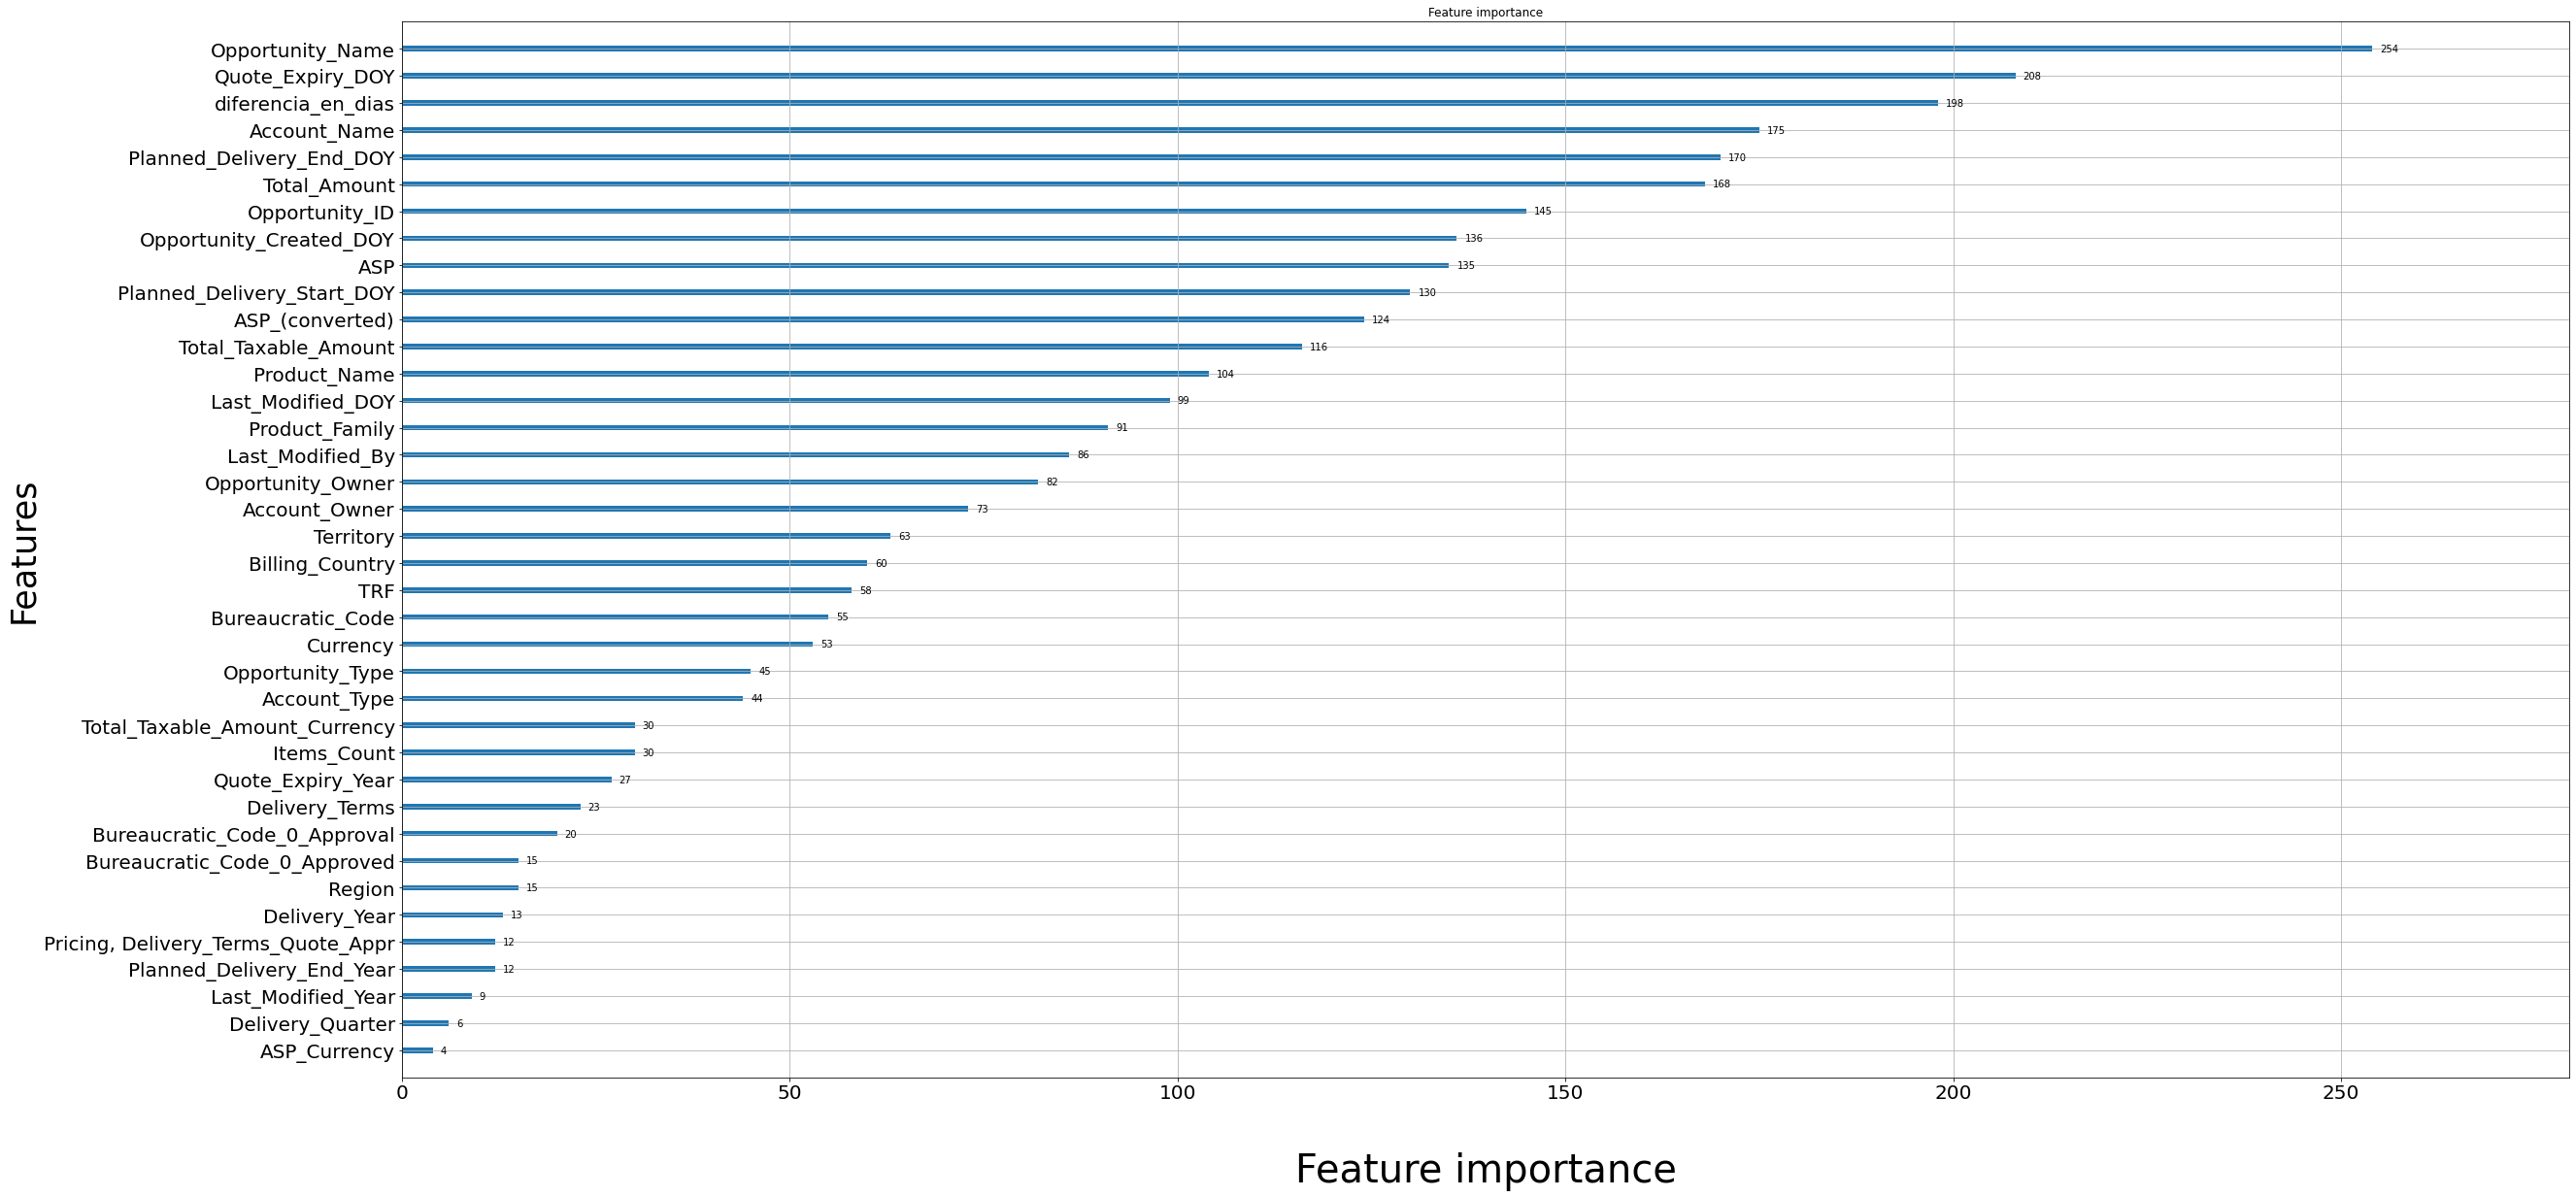

In [14]:
fig = plt.gcf()
fig.set_size_inches(350, 350)
selection = SelectFromModel(model, threshold=0.040, prefit=True)
selected_dataset = selection.transform(x_train)
xgb.plot_importance(booster=model)

plt.rcParams["figure.figsize"] = (40,20)
plt.xlabel("\nFeature importance", fontsize=40)
plt.ylabel("Features", fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

En base a los resultados guardo un df con los primeros cuatro features de mayor importancia

In [8]:
X_train['Target'] = train['Target']

In [9]:
test.drop(columns=['Opportunity_Created_Year', 'Month', 'Account_Created_Date', 'Unnamed: 0'], inplace=True)

In [10]:
Region = list(test['Region'])
le = preprocessing.LabelEncoder()
Region_codificada = le.fit_transform(Region)
test['Region'] = Region_codificada

Territory = list(test['Territory'])
le = preprocessing.LabelEncoder()
Territory_codificada = le.fit_transform(Territory)
test['Territory'] = Territory_codificada

Billing_Country = list(test['Billing_Country'])
le = preprocessing.LabelEncoder()
Billing_Country_codificada = le.fit_transform(Billing_Country)
test['Billing_Country'] = Billing_Country_codificada

Account_Name = list(test['Account_Name'])
le = preprocessing.LabelEncoder()
Account_Name_codificada = le.fit_transform(Account_Name)
test['Account_Name'] = Account_Name_codificada

Opportunity_Name = list(test['Opportunity_Name'])
le = preprocessing.LabelEncoder()
Opportunity_Name_codificada = le.fit_transform(Opportunity_Name)
test['Opportunity_Name'] = Opportunity_Name_codificada

Account_Owner = list(test['Account_Owner'])
le = preprocessing.LabelEncoder()
Account_Owner_codificada = le.fit_transform(Account_Owner)
test['Account_Owner'] = Account_Owner_codificada

Opportunity_Type = list(test['Opportunity_Type'])
le = preprocessing.LabelEncoder()
Opportunity_Type_codificada = le.fit_transform(Opportunity_Type)
test['Opportunity_Type'] = Opportunity_Type_codificada

Quote_Type = list(test['Quote_Type'])
le = preprocessing.LabelEncoder()
Quote_Type_codificada = le.fit_transform(Quote_Type)
test['Quote_Type'] = Quote_Type_codificada

Account_Type = list(test['Account_Type'])
le = preprocessing.LabelEncoder()
Account_Type_codificada = le.fit_transform(Account_Type)
test['Account_Type'] = Account_Type_codificada

Opportunity_Owner = list(test['Opportunity_Owner'])
le = preprocessing.LabelEncoder()
Opportunity_Owner_codificada = le.fit_transform(Opportunity_Owner)
test['Opportunity_Owner'] = Opportunity_Owner_codificada

Delivery_Terms = list(test['Delivery_Terms'])
le = preprocessing.LabelEncoder()
Delivery_Terms_codificada = le.fit_transform(Delivery_Terms)
test['Delivery_Terms'] = Delivery_Terms_codificada

Currency = list(test['Currency'])
le = preprocessing.LabelEncoder()
Currency_codificada = le.fit_transform(Currency)
test['Currency'] = Currency_codificada

Last_Modified_By = list(test['Last_Modified_By'])
le = preprocessing.LabelEncoder()
Last_Modified_By_codificada = le.fit_transform(Last_Modified_By)
test['Last_Modified_By'] = Last_Modified_By_codificada

Product_Family = list(test['Product_Family'])
le = preprocessing.LabelEncoder()
Product_Family_codificada = le.fit_transform(Product_Family)
test['Product_Family'] = Product_Family_codificada

Product_Name = list(test['Product_Name'])
le = preprocessing.LabelEncoder()
Product_Name_codificada = le.fit_transform(Product_Name)
test['Product_Name'] = Product_Name_codificada

ASP_Currency = list(test['ASP_Currency'])
le = preprocessing.LabelEncoder()
ASP_Currency_codificada = le.fit_transform(ASP_Currency)
test['ASP_Currency'] = ASP_Currency_codificada

ASP_converted_Currency = list(test['ASP_(converted)_Currency'])
le = preprocessing.LabelEncoder()
ASP_converted_Currency_codificada = le.fit_transform(ASP_converted_Currency)
test['ASP_(converted)_Currency'] = ASP_converted_Currency_codificada

Delivery_Quarter = list(test['Delivery_Quarter'])
le = preprocessing.LabelEncoder()
Delivery_Quarter_codificada = le.fit_transform(Delivery_Quarter)
test['Delivery_Quarter'] = Delivery_Quarter_codificada

Total_Amount_Currency = list(test['Total_Amount_Currency'])
le = preprocessing.LabelEncoder()
Total_Amount_Currency_codificada = le.fit_transform(Total_Amount_Currency)
test['Total_Amount_Currency'] = Total_Amount_Currency_codificada

Total_Taxable_Amount_Currency = list(test['Total_Taxable_Amount_Currency'])
le = preprocessing.LabelEncoder()
Total_Taxable_Amount_Currency_codificada = le.fit_transform(Total_Taxable_Amount_Currency)
test['Total_Taxable_Amount_Currency'] = Total_Taxable_Amount_Currency_codificada

Prod_Category_A = list(test['Prod_Category_A'])
le = preprocessing.LabelEncoder()
Prod_Category_A_codificada = le.fit_transform(Prod_Category_A)
test['Prod_Category_A'] = Prod_Category_A_codificada

Bureaucratic_Code = list(test['Bureaucratic_Code'])
le = preprocessing.LabelEncoder()
Bureaucratic_Code_codificada = le.fit_transform(Bureaucratic_Code)
test['Bureaucratic_Code'] = Bureaucratic_Code_codificada

test["Total_Amount"] = pd.to_numeric(test["Total_Amount"],errors='coerce')

In [11]:
X_train.drop(columns = ['Opportunity_ID', 'Items_Count', 'Region', 'Territory',
       'Pricing, Delivery_Terms_Quote_Appr', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Billing_Country', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Currency', 'Last_Modified_By', 'Product_Family', 'Product_Name',
       'ASP_Currency', 'ASP', 'ASP_(converted)_Currency', 'ASP_(converted)',
       'Delivery_Quarter', 'Delivery_Year', 'TRF', 'Total_Amount_Currency', 'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'Prod_Category_A', 'Last_Modified_DOY',
       'Last_Modified_Year', 'Opportunity_Created_DOY',
       'Quote_Expiry_Year', 'Planned_Delivery_Start_DOY',
       'Planned_Delivery_Start_Year',
       'Planned_Delivery_End_Year'], inplace=True)

test.drop(columns = ['Opportunity_ID', 'Items_Count', 'Region', 'Territory',
       'Pricing, Delivery_Terms_Quote_Appr', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Billing_Country', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Currency', 'Last_Modified_By', 'Product_Family', 'Product_Name',
       'ASP_Currency', 'ASP', 'ASP_(converted)_Currency', 'ASP_(converted)',
       'Delivery_Quarter', 'Delivery_Year', 'TRF', 'Total_Amount_Currency', 'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'Prod_Category_A', 'Last_Modified_DOY',
       'Last_Modified_Year', 'Opportunity_Created_DOY',
       'Quote_Expiry_Year', 'Planned_Delivery_Start_DOY',
       'Planned_Delivery_Start_Year',
       'Planned_Delivery_End_Year'], inplace=True)

In [13]:
X_train.to_csv('data/train_OH_xgbf.csv')
test.to_csv('data/test_OH_xgbf.csv')